# クラスタリング結果を　CSVファイルに出力する

In [1]:
import pandas as pd
import subprocess
import os

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
import numpy as np

#=============================================
# Inputファイル情報
#=============================================
INPUT_folder = '2_data'        
INPUT_DNAME = 'サンプルデータ.csv'
#=============================================
# Outputファイル情報
#=============================================
OUTPUT_folder = '3_output'
#=============================================
# カレントパス
#=============================================
current_dpath = os.getcwd()
#print('INFO:current_path:' + current_dpath)

#=============================================
# パレントパス
#=============================================
parent_dpath =os.path.sep.join(current_dpath.split(os.path.sep)[:-1])

#print('INFO:parent_path:' + parent_dpath)   

#=============================================
# Inputデータファイル Path
#=============================================
input_dpath =os.path.sep.join([parent_dpath + '\\' + INPUT_folder,INPUT_DNAME])
#print('INFO:input_path:' + input_dpath) 

#=============================================
# Outputデータファイル Path
#=============================================
output_dpath =parent_dpath + '\\' + OUTPUT_folder
#print('INFO:output_path:' + output_dpath)   



In [2]:
#=============================================
# サンプルデータ読み込む
#=============================================
df = pd.read_csv(input_dpath,encoding='shift-JIS')
df = pd.DataFrame(df)


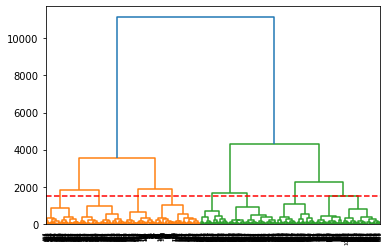

In [3]:

#=============================================
# 分割の閾値設定
#=============================================
# ① クラスタリング位置指定　：　y軸 1500
threshold_distance = 1500

# ② クラスタリング数指定　 ：　8ケ
criter = 8

#=============================================
# linkageの計算
#============================================
Z = linkage(df.iloc[:, 0:4], method='ward')


#=============================================
# linkageの最大距離を確認
#=============================================
#print("最大距離:", np.max(Z[:, 2]))

#=============================================
# デンドログラムを描画
#=============================================
dendro = dendrogram(Z, labels=df["顧客ID"].values)

#=============================================
# 閾値に赤ラインを入れる
#=============================================
plt.axhline(y=threshold_distance, color='red', linestyle='--')
plt.rcParams["font.size"] = 10

#=============================================
# クラスタリング画　保存
#=============================================
plt.savefig(output_dpath + '\\クラスタリング.png')
plt.show()

In [4]:
#=============================================
#  ① クラスタリング位置指定　：　y軸 閾値
#=============================================
labels_distance = fcluster(Z, t=threshold_distance, criterion='distance')

# 結果をDataFrameに
df_distance = df.copy()
df_distance["cluster"] = labels_distance

# クラスタリング画のx軸 左からの 顧客idの順番で並べ替え
ordered_df_distance = df_distance.iloc[dendro["leaves"]].reset_index(drop=True)
#=============================================
# CSV出力
#=============================================-
ordered_df_distance.to_csv(
    output_dpath + '\\クラスタリング結果_距離' + str(threshold_distance) + '_並べ替え.csv',
    index=False,
    encoding='utf-8-sig'
)
    
ordered_df_distance.head(3)  


,顧客ID,年間購入金額（万円）,年齢,性別,年収（万円）,cluster
0,467,387.5,2.0,2.26,-1.44,1
1,435,357.6,5.0,1.94,-0.47,1
2,463,366.0,3.8,2.03,-0.85,1


In [5]:
#=============================================-
# ② クラスタリング数指定　 ：　指定数
#=============================================-
labels_maxclust = fcluster(Z, t=criter, criterion='maxclust')

# 結果をDataFrameに
df_maxclust = df.copy()
# サンプルデータの右端にクラスタリングNoを追加する形式
df_maxclust['cluster'] = labels_maxclust

#=============================================-
# CSV出力
#=============================================-
df_maxclust.to_csv(
    output_dpath + '\\クラスタリング結果_クラスタ数_' + str(criter) + '_.csv',
    index=False,
    encoding='utf-8-sig'
)

df_maxclust.head(3)
  

,顧客ID,年間購入金額（万円）,年齢,性別,年収（万円）,cluster
0,1,26.3,36.0,1.0,800.0,4
1,2,15.3,48.0,2.0,750.0,4
2,3,12.5,54.0,2.0,800.0,4


In [6]:
#=============================================
# 保存フォルダ開く
#=============================================
os.startfile(os.path.realpath(output_dpath) + '\\')

print('処理完了')

処理完了
